출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

In [ ]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

In [2]:
df<-read.csv('./Shelf_Stocking.csv')

In [3]:
colnames(df)<-c('Time','Case')

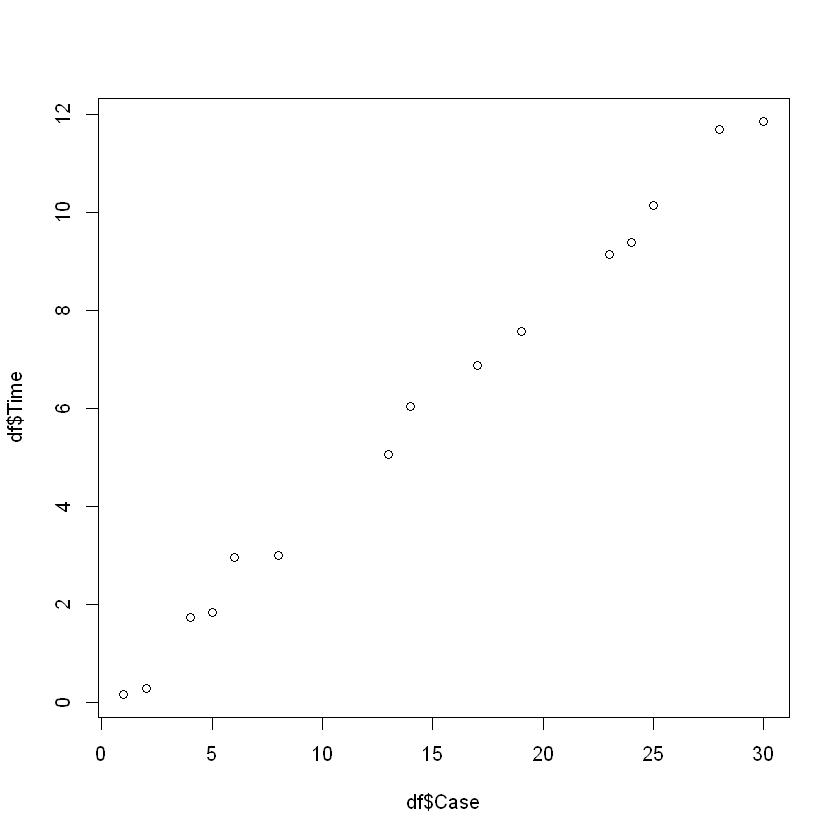

In [4]:
plot(df$Case,df$Time)

<b>Regression from origin<br></b>

In [5]:
fit_or<-lm(Time~0+Case,data=df)
fit<-lm(Time~Case,data=df)

In [6]:
summary(fit_or)
anova(fit_or)


Call:
lm(formula = Time ~ 0 + Case, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5252 -0.2198 -0.1202  0.1070  0.5443 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
Case 0.402619   0.004418   91.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2988 on 14 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9982 
F-statistic:  8305 on 1 and 14 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,741.615371,741.61537058,8305.232,8.012367e-21
Residuals,14,1.250129,0.08929496,NA,NA


In [7]:
summary(fit)
anova(fit)


Call:
lm(formula = Time ~ Case, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4405 -0.1582 -0.1018  0.1357  0.6111 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.093756   0.143577  -0.653    0.525    
Case         0.407107   0.008221  49.519  3.4e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3051 on 13 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9943 
F-statistic:  2452 on 1 and 13 DF,  p-value: 3.399e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Case,1,228.317573,228.31757324,2452.134,3.398506e-16
Residuals,13,1.210427,0.09310975,NA,NA


B0이 유의하지 않음 => constant가 없는 모형이 더 적합<br>
MSres가 intercept 없을 때는 0.089로 있을 때 보다 낮지만, R^2는 더 낮은 것으로 보아 R^2가 비교의 척도 될수 없음

# <b>Hypothesis Testing <br></b>

In [12]:
df<-read.csv('./Rocket_Prop.csv')

In [13]:
df<-df[,c(2,3)]
colnames(df)<-c('Shear_length','Age_Propellant')

shear length가 age of propellant와 관련 있을까?

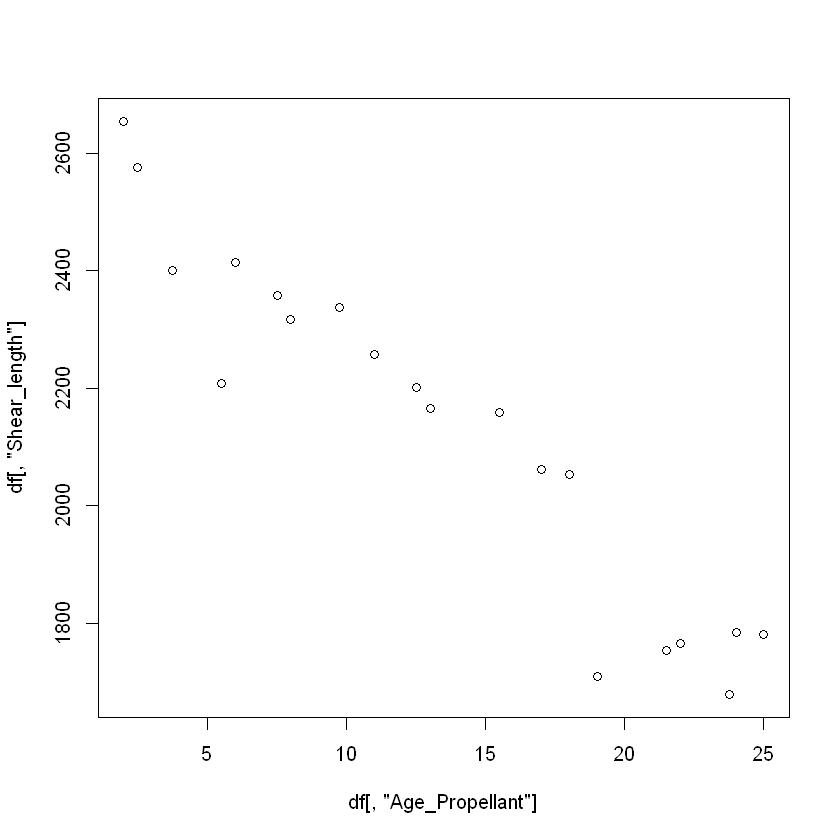

In [15]:
plot(df[,'Age_Propellant'],df[,'Shear_length'] )

In [16]:
fit<-lm(Shear_length~Age_Propellant,data=df)

In [18]:
summary(fit)
qt(0.975,18) # t-test


Call:
lm(formula = Shear_length ~ Age_Propellant, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.98  -50.68   28.74   66.61  106.76 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2627.822     44.184   59.48  < 2e-16 ***
Age_Propellant  -37.154      2.889  -12.86 1.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.11 on 18 degrees of freedom
Multiple R-squared:  0.9018,	Adjusted R-squared:  0.8964 
F-statistic: 165.4 on 1 and 18 DF,  p-value: 1.643e-10


[1] 2.100922

slope: -37.154 ::: age of proplellant 때문에 propllant shear length가 평균적으로 감소하는 정도<br>
t value: 59.48 ::: reject H0 (H0: beta=0 )<br>
p-value : 1.643e-10 :::: there is strong evidence that strength is lineary related to the age of the propellant

In [19]:
anova(fit) #F-test

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age_Propellant,1,1527482.7,1527482.743,165.3768,1.643344e-10
Residuals,18,166254.9,9236.381,NA,NA


F0:165.3768 (t0의 제곱, 하지만 t와 달리 단측 검정에만 사용) ::: reject H0

<b>CI for Coefficient <br></b>

In [20]:
confint(fit)

,2.5 %,97.5 %
(Intercept),2534.99540,2720.6493
Age_Propellant,-43.22338,-31.0838


In [21]:
sigma <- sigma(fit) 
sigma

n <- dim(df)[1]
k <- dim(df)[2]-1
alpha <- 0.05

lower <-  ((n-(k+1))*(sigma^2) )/( qchisq(alpha/2, df = n-(k+1), lower.tail = FALSE) )
upper <- ((n-(k+1))*(sigma^2 ) )/qchisq(1-alpha/2, df = n-(k+1), lower.tail = FALSE)
confint.sigma <- c(lower, upper)
names(confint.sigma) <- c("lower", "upper")
confint.sigma

[1] 96.10609

lower     upper 
 5273.516 20199.245

<b>CI for Mean response <br></b>

In [22]:
x_0<-mean(df[,2])
mean_response <- predict(fit, newdata=data.frame(Age_Propellant=x_0), interval="confidence", level=0.95)
mean_response 

,fit,lwr,upr
1,2131.357,2086.209,2176.506


x_0와 x의 평균과의 거리가 멀어질 수록 CI가 증가한다 -> Extrapolation의 위험성

<b>PI <br></b>

In [23]:
pred <- predict(fit, newdata=data.frame(Age_Propellant=x_0), level=0.95, interval = 'prediction')
pred

,fit,lwr,upr
1,2131.357,1924.46,2338.255


PI가 CI보다 넓어짐<br>
x_0값을 가진 새로운 propellant는 길이가 1924에서 2338일 것으로 예상 됨

In [24]:
summary(fit)$r.squared 

[1] 0.9018414

shear length의 변동성의 90.18%가 회귀 모형에 의해 설명 됨<br>
1.R^2은 변수를 추가할 수록 높아짐<br>
2.R^2가 높다고 더 좋은 모형이 아니기 때문에 모형 간의 비교에 사용 못함 <br>
3.regressor의 range에 영향 받음 (x의 범위가 커질 수록 R^2 커짐)<br>
4.모형의 적합성을 설명 못함 (비선형적으로 관계 있어도 R^2 커짐)

[주의사항]<br>
1.회귀모형은 주로 interpolation을 위해 사용 <br>
2.회귀계수는 먼 x값에 의해 영향을 받음 <br>
3.outlier는 나머지 데이터와 매우 다른 데이터 ::: 나쁜 값일 수도 있고 매우 중요한 데이터일 수도 있음 <br>
4.회귀 분석은 인과관계를 설명하는 것이 아니라 연관성을 말하는 것 (상관관계의 문제를 설명할 수 있을 뿐) <br>

<b>Simultaneous C.I <br></b>
Boneferoni: Scheffe 보다 신뢰 구간 짧지만 만들기 쉬움

In [25]:
a=0.05
confint(fit, level = (1-a/2))

,1.25 %,98.75 %
(Intercept),2519.79245,2735.85227
Age_Propellant,-44.21747,-30.08971


90% confidence로 두 파라미터에 대해 옳바른 추정을 함

<b>Simple Residual Analysis <br></b>

In [26]:
resid(fit)

1           2           3           4           5           6 
 106.758301  -67.274574  -14.593631   65.088687 -215.977609 -213.604131 
          7           8           9          10          11          12 
  48.563824   40.061618    8.729573   37.567141   20.374323  -88.946393 
         13          14          15          16          17          18 
  80.817415   71.175153  -45.143358   94.442278    9.499187   37.097528 
         19          20 
 100.684823  -75.320154

5,6번이 outlier 가능성

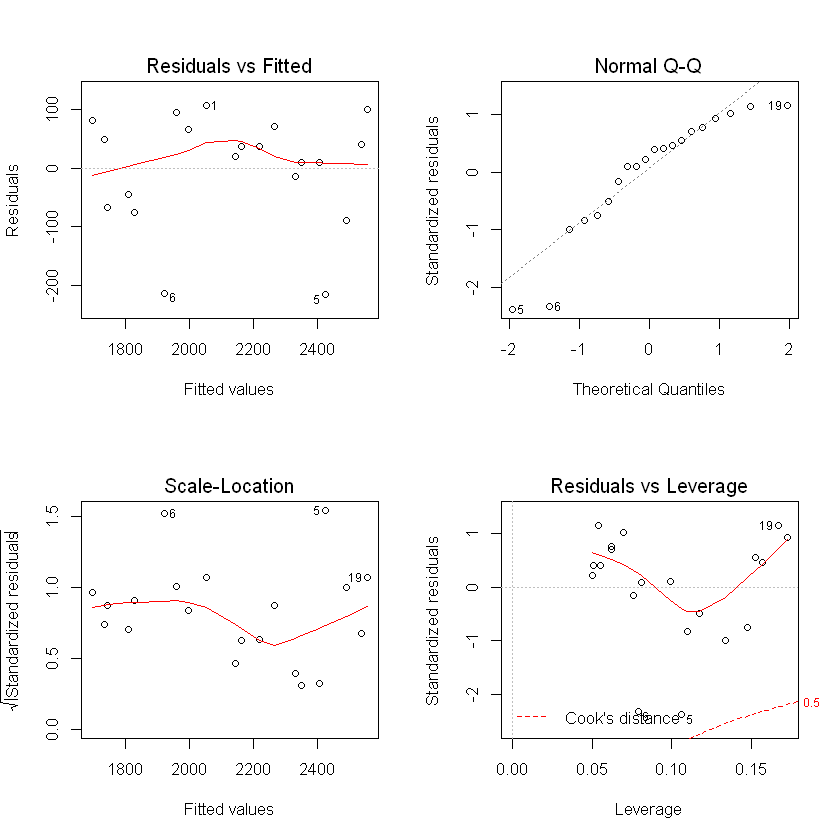

In [27]:
par(mfrow=c(2,2))
plot(fit)

In [28]:
summary(fit)
summary(lm(Shear_length~Age_Propellant,data=df[-c(5,6),]))


Call:
lm(formula = Shear_length ~ Age_Propellant, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.98  -50.68   28.74   66.61  106.76 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2627.822     44.184   59.48  < 2e-16 ***
Age_Propellant  -37.154      2.889  -12.86 1.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.11 on 18 degrees of freedom
Multiple R-squared:  0.9018,	Adjusted R-squared:  0.8964 
F-statistic: 165.4 on 1 and 18 DF,  p-value: 1.643e-10



Call:
lm(formula = Shear_length ~ Age_Propellant, data = df[-c(5, 6), 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-118.07  -35.67   11.31   44.75   83.98 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2658.973     30.533   87.08  < 2e-16 ***
Age_Propellant  -37.694      1.979  -19.05 2.02e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 62.97 on 16 degrees of freedom
Multiple R-squared:  0.9578,	Adjusted R-squared:  0.9551 
F-statistic: 362.9 on 1 and 16 DF,  p-value: 2.023e-12


5,6번 제거 후 MS_res 5000 이상이나 감소했지만 회귀 계수는 거의 변화 없음->influential point 아님<br>
만약 진짜 나쁜 값이 었다면 제거 후 파라미터 추정 값의 정확성 향상 되거나, CI, PI 길이 줄어 들었어야 됨